<h2 align="center">Testing The Monty Hall Problem with Python<h3>

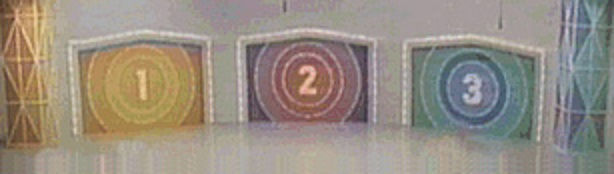

In [1]:
from IPython.display import Image
Image(filename='doors.jpg')

Image Source: http://www.letsmakeadeal.com/images/85-Doors.jpg

### Introduction

The Monty Hall problem first featured on the classic game show "Let's make a Deal". In a segment of the show, contestants were presented with a choice of three different doors. Behind two of the doors would be a goat, and behind the third would be a Lamborghini.    

The contestant begins by picking one door. The host, Monty Hall, would then open one of the remaining doors. Monty *never* opened the door which containted the Lamborghini. The door Monty opens always containts a goat. At this point, the contestant was presented with a decision:   

1) Open the original door selection in hopes a Lamborghini was inside or,    
2) Switch to the other unopened door   

In this post, I will examine the theoretical probability of each selection, and then I will use Python to test and prove the theory.

### Probability

Which of these options presents a better chance of winning the car? Are the odds of winning the same, better, or worse if the contestant switches? 

Before the contestant chooses a door, there a 1/3 chance they select the door containing the Lamborghini. After Monty opens a goat door, there are two doors remaining, and one of them contains a Lamborghini. If this decision is considered in a vacuum, it might appear the contestant has a 50% chance of winning. 

ucanalytics.com provides the following formulaic breakdown of Bayes' Theorem as applies to this problem. In their breakdown, it is assumed the contestant has selected Door A.

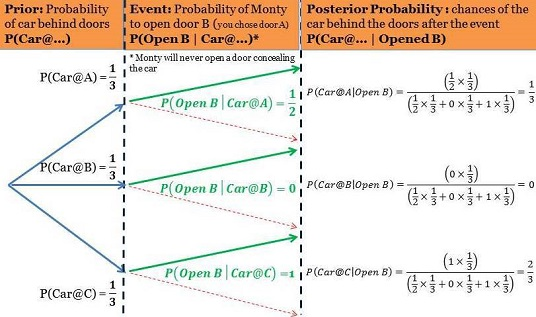

In [2]:
Image(filename='Monty-Hall-Problem.jpg')

Image Source: http://i0.wp.com/ucanalytics.com/blogs/wp-content/uploads/2014/03/Monty-Hall-Problem-1.jpg

As previously discussed, there is a 0% chance Monty will open the door which contains the Lamborghini. This 0% chance means there is a 2/3 probability the car is in the unopened door the contestant did not originally select (Door C). By choosing to switch, the contestant is betting the car is in one of the two unselected doors (2/3), as opposed to just the initial odds the car is in the originally selected door (1/3). 

### Using Python to Determine and Prove Probability

To examine the probability of switching vs. staying, I will use the NumPy (Numerical Python) library to generate random door selections and results.

In [3]:
import numpy as np

In [4]:
x = np.random.random_integers(low=1,high=3,size=(5,2))
x

array([[3, 3],
       [2, 1],
       [1, 1],
       [1, 3],
       [2, 2]])

The previous array provides pairs of random integers. For this analysis, we will assume the first value is the originally selected door, and the second value is the door which contains the car.   

If we consider the pair [2,3], the contestant has guessed the car is behind Door 2, but the car is actually behind Door 3. We know Monty will never open a door containing a car, so Monty proceeds to open Door 1. If the contestant stays with their original selection, they will be riding home on a goat instead of an expensive sports car.   

The following functions simulate wins and losses for each of the two options. A win is represented with a 1, and a loss with a 0.

In [5]:
def switch_doors(turns=1):
    
    x = np.random.random_integers(low=1,high=3,size=(turns,2))
    
    results = []
        
    for selected_door, winning_door in x:
        # when you switch doors, a contestant only loses when the car was 
        # behind the original door.
        if selected_door == winning_door:
            results.append(0.)
        else:
            results.append(1.)

    return sum(results) / turns

In [6]:
def do_not_switch_doors(turns=1):
    
    x = np.random.random_integers(low=1,high=3,size=(turns,2))
    
    results = []
        
    for selected_door, winning_door in x:
        # when you keep your original door, the only time you win is when the lamborghini
        # was in your original selection.
        if selected_door == winning_door:
            results.append(1.)
        else:
            results.append(0.)

    return sum(results) / turns

By incorporating the numpy's random integers method into our function, I can provide a function with different numbers of simulations. 5 or more simulations would indicate Monty let you play the game 5 or more times. There is a slim chance he's feeling so generous, but let's see what would happen anyway.

In [7]:
s= 'percent of the 30 turns won a car when we did not switch.'

print '%s %s ' % ((str(do_not_switch_doors(turns=5) * 100) , s))
print '%s %s ' % ((str(do_not_switch_doors(turns=30) * 100) , s))
print '%s %s ' % ((str(do_not_switch_doors(turns=1000) * 100) , s))

60.0 percent of the 30 turns won a car when we did not switch. 
36.6666666667 percent of the 30 turns won a car when we did not switch. 
31.6 percent of the 30 turns won a car when we did not switch. 


In [8]:
s = 'percent of the 5 turns won a car when switching!'

print '%s %s' % (str(switch_doors(turns=5) * 100) , s)
print '%s %s' % (str(switch_doors(turns=30) * 100) , s)
print '%s %s' % (str(switch_doors(turns=1000) * 100) , s)

80.0 percent of the 5 turns won a car when switching!
76.6666666667 percent of the 5 turns won a car when switching!
66.3 percent of the 5 turns won a car when switching!


Notice the winning percentages are almost exactly the same as the theoretical odds when Monty gives you 1 million turns.

In [9]:
print '%s percent of the 1,000,000 turns won a car when switching!' % str(switch_doors(turns=1000000) * 100)
print 'Only %s percent of the 1000 turns won a car when we did not switch. Looks like it will be a long trip home on a goat.' \
% str(do_not_switch_doors(turns=1000000) * 100)

66.6872 percent of the 1,000,000 turns won a car when switching!
Only 33.2736 percent of the 1000 turns won a car when we did not switch. Looks like it will be a long trip home on a goat.


### Examining the Distribution of Results

In [12]:
%matplotlib inline
#histogram is separate .py file found in repo
import histogram as hist

I customized Python's visualization library, Matplotlib, in the file histogram.py. Using this function, we can examine the distribution of results. 

The following plots are distributions of 1 million simulations. In each simulation, Monty had 100 allowed contestants from the audience to play the game. Our first chart shows the distribution when all contestants chose to switch doors. The second chart is the distribution when all contestants chose to keep their original selection.

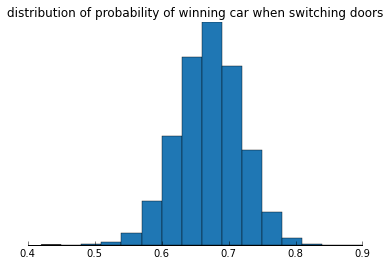

In [13]:
switch_results = []
simulations = 1000000

for x in range(simulations):
    x = switch_doors(turns=100)
    switch_results.append(x)
    
fig = hist.plot_results(switch_results, choice = 'switching')

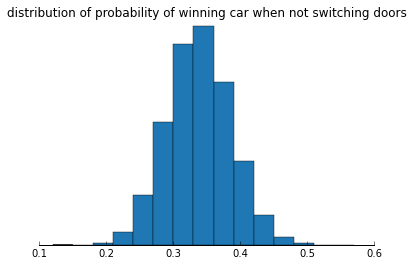

In [14]:
do_not_switch_results = []
simulations = 1000000

for x in range(simulations):
    x = do_not_switch_doors(turns=100)
    do_not_switch_results.append(x)
        
fig = hist.plot_results(results = do_not_switch_results, choice = 'not switching')

As the distributions show, in only the rarest circumstances did a majority of an audience lose when switching. By comparison, the audience almost never had a majority of contestants win after keeping with their original choice.